### Homework Instructions:

Perform a Monte Carlo simulation to calculate Value at Risk (VaR) for the Apple stock price using the file attached to this lesson. 
There exist a number of ways to do this type of analysis, but you can follow this basic procedure 
(refer to this PDF (mc.pdf) for a more rigorous mathematical overview):

The file (apple.2011.csv) has 3 columns: date, price, and percent change.  
The information you are really interested in is the percent change.  
This value is the percent change in the price from the previous date to the date on the corresponding row.

Use the percent change values to create a Gaussian random number generator.  
This generator will create Gaussian-distributed randoms to use as hypothetical percent changes on the day to day price of Apple stock.

With that generator, create 20 random numbers.  With these randoms, you can find a potential price change over 20 days.

Start with the price from the last row and the random numbers to determine a hypothetical price after 20 days.  
To do this, take that last price, apply a percent change and get a new price.  
Then take that new price, and apply the next percent change.  Do this for the 20 randoms, and get a final price.

Store the final price after 20 days (you can discard the intermediate price values).

Repeat steps 3-5 a very large number of times.  Something like 10000.  Each run will yield a different result.

Take all of the stored prices (10000 or so), sort them, and find the 1% lowest percentile.  
This value is the final result, and represents the VaR with 99% confidence.  
This means that the price will be above this result after 20 days with a confidence level of 99%.

The other requirement for this assignment is to use an IPython Notebook.  
Include in the notebook all the code, the results, and any other information you feel is needed (charts, graphs, plots, etc).  
Rather than submitting .py files, give me the .ipynb file for your notebook.


### Some Imports and Constants:

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from decimal import *

SHOW_PLOT = True
NUM_DAYS = 20
NUM_ITERATIONS = 10000
#NUM_ITERATIONS = 1000
PRICE_FROM_LAST_ROW = 405
DEBUG_PRINT_PRICES_IN_LOOP = False

### Load the Data and Check it Out:

In [6]:
# next line is just for iPython
# %matplotlib inline
df = pd.read_csv('apple.2011.csv')
df.columns = ['Date','Last','PctChange']

df.PctChange = pd.to_numeric(df.PctChange, errors='coerce')
# only keep the rows with numeric change:
df = df[df.PctChange * df.PctChange > 0]

print('---------------------')
print('THE HEAD 10: ')
print('---------------------')
print df.head()
print('---------------------')
print('THE TAIL 10: ')
print('---------------------')
print df.tail()

---------------------
THE HEAD 10: 
---------------------
        Date     Last  PctChange
1   1/4/2011  331.290   0.005219
2   1/5/2011  334.000   0.008180
3   1/6/2011  333.730  -0.000808
4   1/7/2011  336.120   0.007161
5  1/10/2011  342.455   0.018847
---------------------
THE TAIL 10: 
---------------------
           Date    Last  PctChange
247  12/23/2011  403.33   0.011993
248  12/27/2011  406.53   0.007934
249  12/28/2011  402.64  -0.009569
250  12/29/2011  405.12   0.006159
251  12/30/2011  405.00  -0.000296


### Plot some of the actual prices:

In [ ]:
change_plot = df.PctChange.hist(bins=20)
change_plot.set_title("Value at Risk (VaR)")
change_plot.set_xlabel("Num Days with")
change_plot.set_ylabel("Pct Change")
if(SHOW_PLOT):
	plt.show(change_plot)

### Look at some of the % changes

In [ ]:
df["PctChange"] = df["PctChange"].astype(float)
daily_changes = df["PctChange"].tolist()

print('---------------------')
print "sample daily_changes:"
print('---------------------')
print daily_changes[:10]

### Some other helpful numbers:

In [ ]:
# spreadsheet says 0.24=SUM(C3:C253) - just double checking that the mean really is zero.
daily_change_min = min(daily_changes)
daily_change_max = max(daily_changes)
daily_change_mean = np.mean(daily_changes)
daily_change_sum = sum(daily_changes)
daily_change_count = len(daily_changes)

mu = (daily_change_sum / daily_change_count)
sigma = np.std(daily_changes)

print('---------------------')
print('Some Helpful Values:')
print('---------------------')
print('PRICE_FROM_LAST_ROW: %f' % PRICE_FROM_LAST_ROW)
print("MAX: %f" % daily_change_max)
print("MEAN: %f" % daily_change_mean)
print("SUM: %f" % daily_change_sum)
print("COUNT: %f" % daily_change_count)
print("MU: %f" % mu)
print("SIGMA: %f" % sigma)
print('---------------------')

## Now Run the Loop"

In [ ]:
end_prices = []

for i in range(1,NUM_ITERATIONS):
    daily_price = PRICE_FROM_LAST_ROW
    sample = np.random.normal(mu, sigma, NUM_DAYS)

    for next_change_pct in sample:
        daily_price = daily_price + (daily_price * next_change_pct)

    if(i % 1000 == 0):
        print("Iteration #%i = %d" % (i,daily_price))

    if(DEBUG_PRINT_PRICES_IN_LOOP):
        print("END PRICE: ", daily_price)
    end_prices.append(daily_price)

end_prices_sorted = sorted(end_prices)
array_index_to_get = NUM_ITERATIONS / 100
print('-----------------------------------')
print('THE 1 PERCENT PRICE IS: %d ' % end_prices_sorted[array_index_to_get])
print('-----------------------------------')

### So 99% of the time, AAPLers would have remained above 346 dollars per share after 20 days!

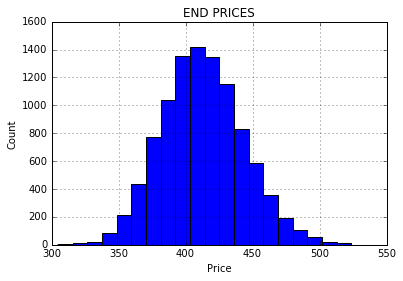

In [24]:
prices_df = pd.DataFrame(end_prices)
prices_df.columns = ['PRICE']

end_price_plot = prices_df.PRICE.hist(bins=20)
end_price_plot.set_title("END PRICES")
end_price_plot.set_xlabel("Price")
end_price_plot.set_ylabel("Count")
if(SHOW_PLOT):
	plt.show(end_price_plot)
